In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
analysis_dir = Path("/home/srs-9/Projects/ms_mri/monai_analysis")
df_t1 = pd.read_csv(
    analysis_dir / "choroid_pineal_pituitary_T1-1" / "clinical_data_full.csv"
)
df_flair = pd.read_csv(
    analysis_dir / "choroid_pineal_pituitary_FLAIR-1" / "clinical_data_full.csv"
)
df_t1_flair = pd.read_csv(
    analysis_dir / "choroid_pineal_pituitary3" / "clinical_data_full.csv"
)

curr_dir = Path("/home/srs-9/Projects/ms_mri/analysis/paper1")

In [7]:
df = df_t1[["subid", "ms_type", "flair_contrast"]]
df.loc[df["ms_type"].isin(["CIS", "RRMS"]), "ms_type"] = "RMS"
df.loc[df["ms_type"].isin(["PPMS", "SPMS", "RPMS", "PRMS"]), "ms_type"] = "PMS"

In [8]:
df.loc[:, ["cp_t1_vol"]] = df_t1["choroid_volume"]
df.loc[:, ["cp_flair_vol"]] = df_flair["choroid_volume"]
df.loc[:, ["cp_t1.flair_vol"]] = df_t1_flair["choroid_volume"]

df.loc[:, ["pin_t1_vol"]] = df_t1["pineal_volume"]
df.loc[:, ["pin_flair_vol"]] = df_flair["pineal_volume"]
df.loc[:, ["pin_t1.flair_vol"]] = df_t1_flair["pineal_volume"]

df.loc[:, ["pit_t1_vol"]] = df_t1["pituitary_volume"]
df.loc[:, ["pit_flair_vol"]] = df_flair["pituitary_volume"]
df.loc[:, ["pit_t1.flair_vol"]] = df_t1_flair["pituitary_volume"]

In [9]:
df = df.set_index("subid")
df_t1.set_index("subid")

,subject,sz_onset,dzdur,flair_contrast,MSSS,gMSSS,ARMSS,sex,choroid_volume,pineal_volume,...,DMT7,%DMT7_overlap,DMT8,%DMT8_overlap,DMT9,%DMT9_overlap,DMT10,%DMT10_overlap,scan_folder,label
subid,,,,,,,,,,,,,,,,,,,,,
1001,ms1001,2/1/2003,14.03931446,WITH,1.03,1.68,1.56,Female,2198.554199,66.048790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3Tpioneer_bids/sub-ms1001/ses-20170215,srs-9/3Tpioneer_bids_predictions/sub-ms1001/se...
1002,ms1002,4/1/2019,1.138914746,WITH,4.30,4.31,4.63,Female,1586.693970,288.769104,...,.,.,.,.,.,.,.,.,3Tpioneer_bids/sub-ms1002/ses-20200521,srs-9/3Tpioneer_bids_predictions/sub-ms1002/se...
1003,ms1003,1/1/2003,14.2391721,WITH,6.56,7.34,4.53,Female,2187.436035,262.164642,...,.,.,.,.,.,.,.,.,3Tpioneer_bids/sub-ms1003/ses-20170329,srs-9/3Tpioneer_bids_predictions/sub-ms1003/se...
1004,ms1004,10/1/2015,3.931446093,WITHOUT,2.87,3.65,4.53,Female,931.325623,187.391525,...,.,.,.,.,.,.,.,.,3Tpioneer_bids/sub-ms1004/ses-20190906,srs-9/3Tpioneer_bids_predictions/sub-ms1004/se...
1005,ms1005,1/1/2001,19.51486612,WITHOUT,2.99,4.25,6.01,Female,3248.199219,179.715927,...,.,.,.,.,.,.,.,.,3Tpioneer_bids/sub-ms1005/ses-20200708,srs-9/3Tpioneer_bids_predictions/sub-ms1005/se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3Tpioneer_bids/sub-ms3010/ses-20170612,srs-9/3Tpioneer_bids_predictions/sub-ms3010/se...
3009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3Tpioneer_bids/sub-ms3009/ses-20170628,srs-9/3Tpioneer_bids_predictions/sub-ms3009/se...
3006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3Tpioneer_bids/sub-ms3006/ses-20170808,srs-9/3Tpioneer_bids_predictions/sub-ms3006/se...


In [10]:
df.to_csv(curr_dir / "inference_volumes.csv")

<BarContainer object of 2 artists>

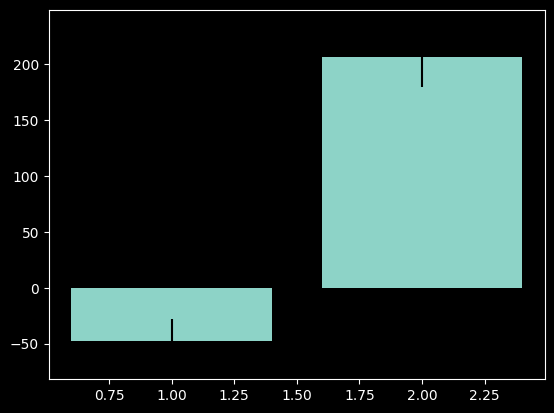

In [ ]:
cp_diff = df["cp_t1_vol"] - df["cp_flair_vol"]
plt.bar(
    [1, 2],
    [
        cp_diff[df["flair_contrast"] == "WITH"].mean(),
        cp_diff[df["flair_contrast"] == "WITHOUT"].mean(),
    ],
    yerr=[
        cp_diff[df["flair_contrast"] == "WITH"].sem(),
        cp_diff[df["flair_contrast"] == "WITHOUT"].sem(),
    ],
)

<BarContainer object of 3 artists>

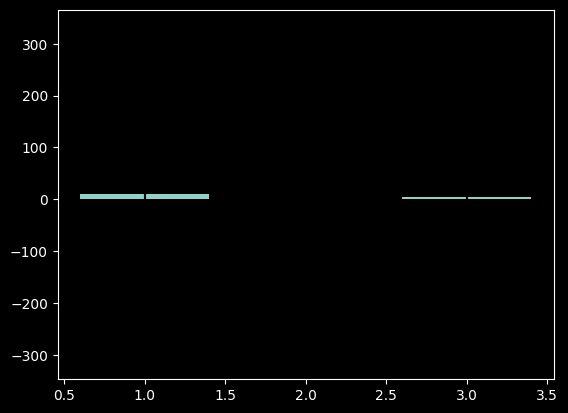

In [18]:
plt.bar(
    [1, 2, 3],
    [
        cp_diff[df["ms_type"] == "RMS"].mean(),
        cp_diff[df["ms_type"] == "OIND"].mean(),
        cp_diff[df["ms_type"] == "NIND"].mean(),
    ],
    yerr=[cp_diff[df["ms_type"] == "RMS"].std(),
        cp_diff[df["ms_type"] == "OIND"].std(),
        cp_diff[df["ms_type"] == "NIND"].std()]
)

(array([ 5.,  3.,  1.,  4., 15.,  4.,  6.,  0.,  0.,  2.]),
 array([-595.45459  , -452.6576051, -309.8606202, -167.0636353,
         -24.2666504,  118.5303345,  261.3273194,  404.1243043,
         546.9212892,  689.7182741,  832.515259 ]),
 <BarContainer object of 10 artists>)

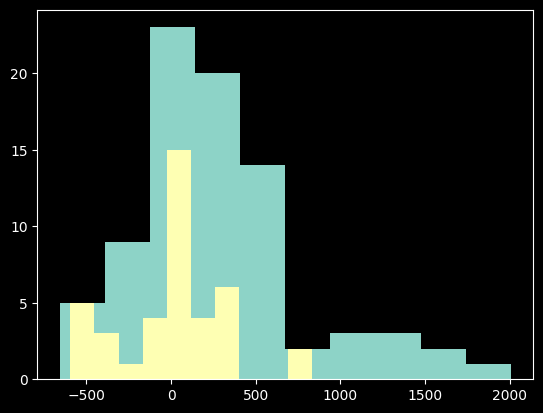

In [24]:
plt.hist(cp_diff[df["ms_type"] == "PMS"])
plt.hist(cp_diff[df["ms_type"] == "NIND"])

<BarContainer object of 2 artists>

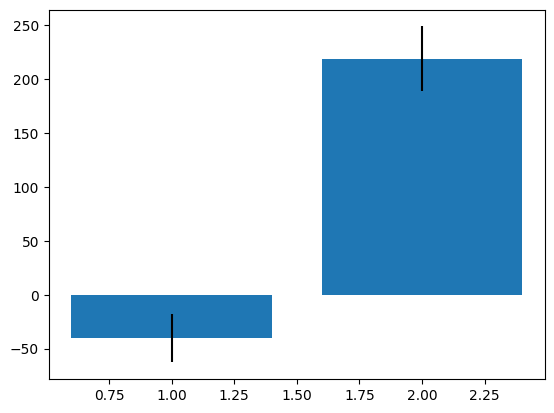

In [27]:
cond1 = (df["flair_contrast"] == "WITH") & (df["ms_type"].isin(["RMS", "PMS"]))
cond2 = (df["flair_contrast"] == "WITHOUT") & (df["ms_type"].isin(["RMS", "PMS"]))

plt.bar(
    [1, 2],
    [cp_diff[cond1].mean(), cp_diff[cond2].mean()],
    yerr=[cp_diff[cond1].sem(), cp_diff[cond2].sem()],
)

<BarContainer object of 2 artists>

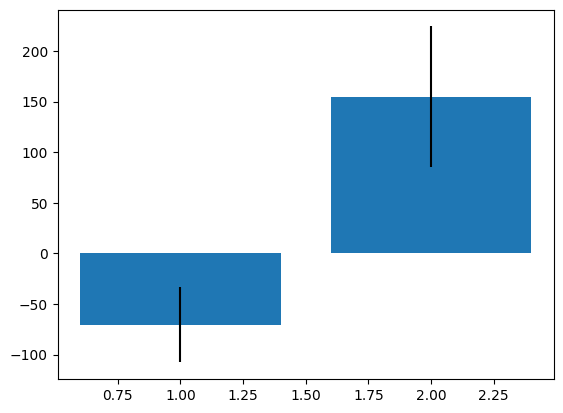

In [28]:
cond1 = (df["flair_contrast"] == "WITH") & (df["ms_type"].isin(["OIND", "NIND"]))
cond2 = (df["flair_contrast"] == "WITHOUT") & (df["ms_type"].isin(["OIND", "NIND"]))

plt.bar(
    [1, 2],
    [cp_diff[cond1].mean(), cp_diff[cond2].mean()],
    yerr=[cp_diff[cond1].sem(), cp_diff[cond2].sem()],
)